In [242]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.zscoring as zscoring
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import pickle
import re
import ast
import importlib

In [243]:
pd.set_option('display.max_colwidth', 0)  # 0 means unlimited in newer pandas versions

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Don’t truncate column contents
pd.set_option("display.max_colwidth", None)

# Expand the display to the full width of the screen
pd.set_option("display.width", 0)


In [244]:
df_path = r"C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp/outputs/rce_zscore_putative_types.csv"

In [245]:
# 1) Read
units_df = pd.read_csv(df_path)
units_df.head(30)

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows,putative type
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.939130,1.459821,0.75,-0.129557,not sig,40,pyramidal
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,3.191304,4.476306,2.70,-0.109757,not sig,40,pyramidal
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,1.434783,3.471325,1.85,0.119614,not sig,40,pyramidal
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,10.554348,8.245900,6.90,-0.443171,not sig,40,pyramidal
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,43.439130,33.150621,32.15,-0.340541,not sig,40,pyramidal
5,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,130,0.686957,0.926567,1.05,0.391816,not sig,40,pyramidal
6,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,143,10.991304,12.726894,9.70,-0.101463,not sig,40,pyramidal
7,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,147,0.371739,1.175319,0.60,0.194212,not sig,40,pyramidal
8,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,158,3.400000,4.478062,5.70,0.513615,not sig,40,pyramidal
9,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,189,19.228261,9.698614,18.15,-0.111177,not sig,40,pyramidal


In [246]:
units_df = units_df[units_df['sig'] != 'not sig']
units_df = units_df.drop(["Global Pre-event M", "Global Pre-event SD", "Event M"], axis=1)

In [247]:
df = units_df.copy()
event_df = df[df['Event name'] == 'high_comp_win']

significant_units = event_df['Unit number'].unique()
print(f"Number of significant units for high_comp_win: {len(significant_units)}")

Number of significant units for high_comp_win: 27


In [248]:
units_df.head(10)

,Recording,Event name,Unit number,Event Z-Score,sig,Event windows,putative type
15,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,232,2.196282,increase,40,pyramidal
58,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp,23,2.526329,increase,9,pyramidal
124,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp_win,23,2.717424,increase,8,pyramidal
154,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,lose,104,2.096743,increase,7,pyramidal
170,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,lose,33,2.188618,increase,7,pyramidal
183,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,low_comp,147,2.081513,increase,11,pyramidal
190,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,low_comp,23,1.669298,increase,11,pyramidal
192,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,low_comp,33,1.738209,increase,11,pyramidal
194,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,low_comp,65,2.198388,increase,11,pyramidal
198,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,low_comp_lose,104,2.439251,increase,6,pyramidal


### Integrate Putative Types | get csv with putative types and dataframe here and combine them

Using functions from venn_upset_plot_creation.py that allow us to create venn and upset plots as well as find overlapping sig neurons per event

In [249]:
# using os to use functions from this py file C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\other_peoples_sutff\Thomas\reward_comp\venn_upset_plot_creation.py
import os
import sys
module_path = r"C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp"
sys.path.append(module_path)

from venn_upset_plot_creation import create_venn_diagram, analyze_event_overlap, create_overlap_visualization

In [250]:
# use importlib to reload venn_upset_plot_creation if we make changes to it
import importlib
importlib.reload(sys.modules['venn_upset_plot_creation'])

<module 'venn_upset_plot_creation' from 'C:\\Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp\\venn_upset_plot_creation.py'>

EXAMPLE 1: Alone Rewarded vs Win vs Lose Events
alone_rewarded: 20 significant units
win: 39 significant units
lose: 59 significant units

Three-way overlap: 2 units
Three-way overlap units: ['20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec__Unit68', '20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec__Unit74']

Pairwise overlaps:
  alone_rewarded & win: 8 units
  alone_rewarded & lose: 4 units
  win & lose: 10 units


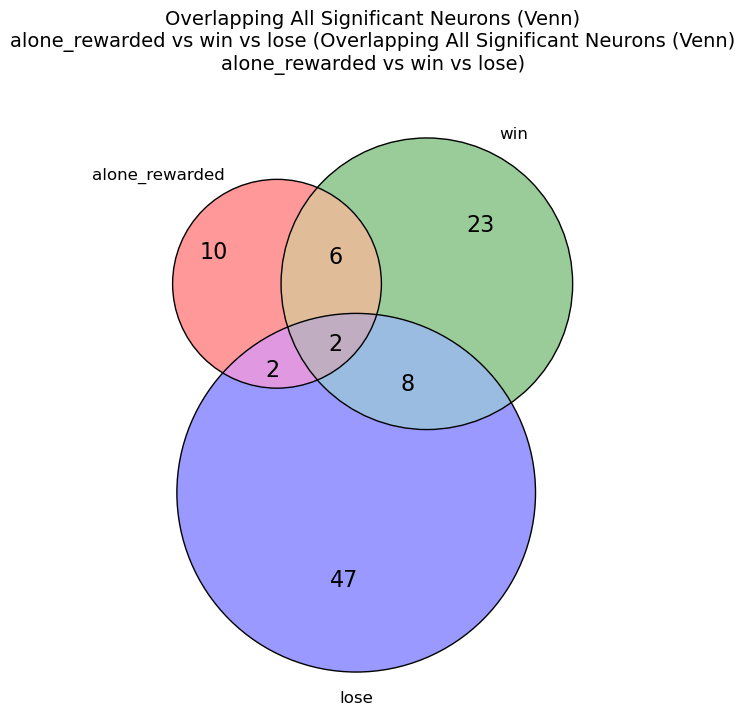

In [251]:
# Example 1: Compare 'alone_rewarded', 'win', and 'lose' events (your specific example)
print("EXAMPLE 1: Alone Rewarded vs Win vs Lose Events")
events_to_compare = ['alone_rewarded', 'win', 'lose']
_ = create_venn_diagram(units_df, events_to_compare, significance_type='both', 
                        title="All Significant Units");

In [252]:
hc_df = units_df[units_df['Event name'] == 'high_comp_win'].copy()
hc_df.head()
print(len(hc_df))

31


### Problem, even though it says both for sig type it only have increase

In [253]:

hc_df_increasing = hc_df[hc_df['sig'] == 'increase']
hc_df_decreasing = hc_df[hc_df['sig'] == 'decrease']

print(f"Number of increasing units for high_comp_win: {len(hc_df_increasing)}")
print(f"Number of decreasing units for high_comp_win: {len(hc_df_decreasing)}")

Number of increasing units for high_comp_win: 27
Number of decreasing units for high_comp_win: 4


In [257]:
significant_units = hc_df[hc_df['sig'].isin(['increase', 'decrease'])]['Unit number'].unique()
print(f"Number of significant units for high_comp_win: {len(significant_units)}")


Number of significant units for high_comp_win: 27



EXAMPLE 2: High Competition Win vs Lose
high_comp_win: 31 significant units
high_comp_lose: 66 significant units

Overlap between high_comp_win and high_comp_lose: 10 units


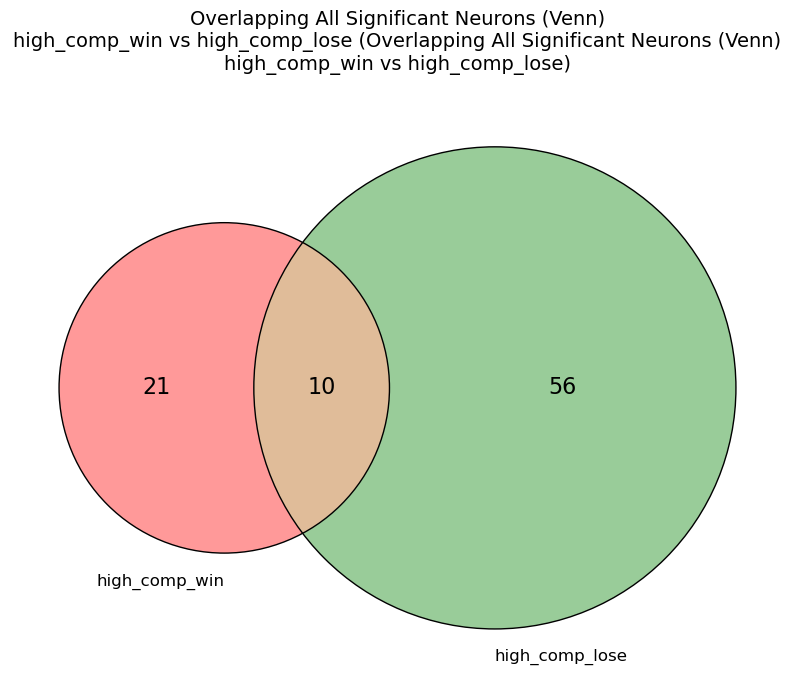

In [258]:
# Example 2: Compare high competition win vs lose (2-way comparison)
print("\nEXAMPLE 2: High Competition Win vs Lose")
high_comp_events = ['high_comp_win', 'high_comp_lose']
_ = create_venn_diagram(units_df, high_comp_events, significance_type='both');


EXAMPLE 3: High vs Low Competition - Increasing Units Only
high_comp: 30 significant units
low_comp: 41 significant units

Overlap between high_comp and low_comp: 14 units


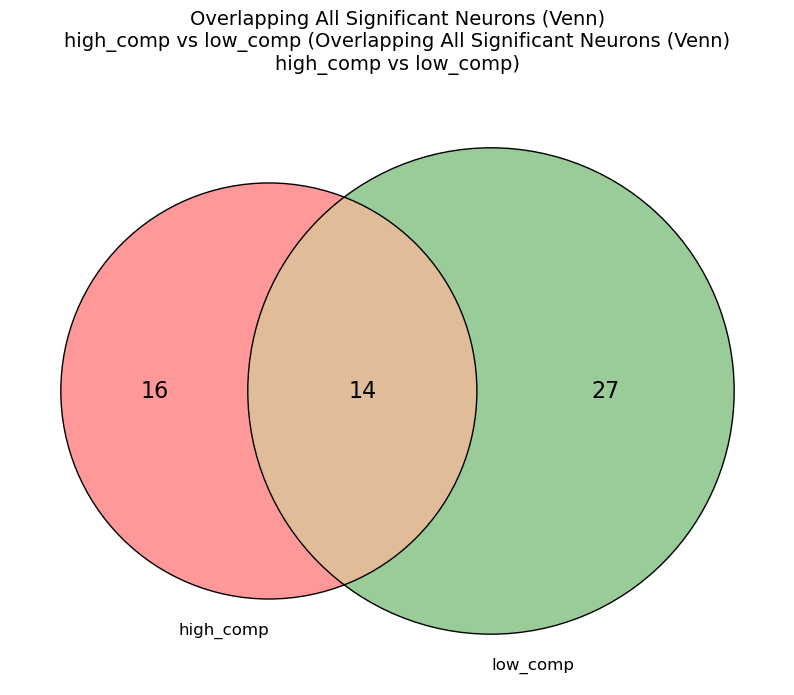

In [259]:
# Example 3: Look at only INCREASING units for competition events
print("\nEXAMPLE 3: High vs Low Competition - Increasing Units Only")
competition_events = ['high_comp', 'low_comp']
_ = create_venn_diagram(units_df, competition_events, significance_type='both');

win: 39 significant units
lose: 59 significant units

Overlap between win and lose: 10 units


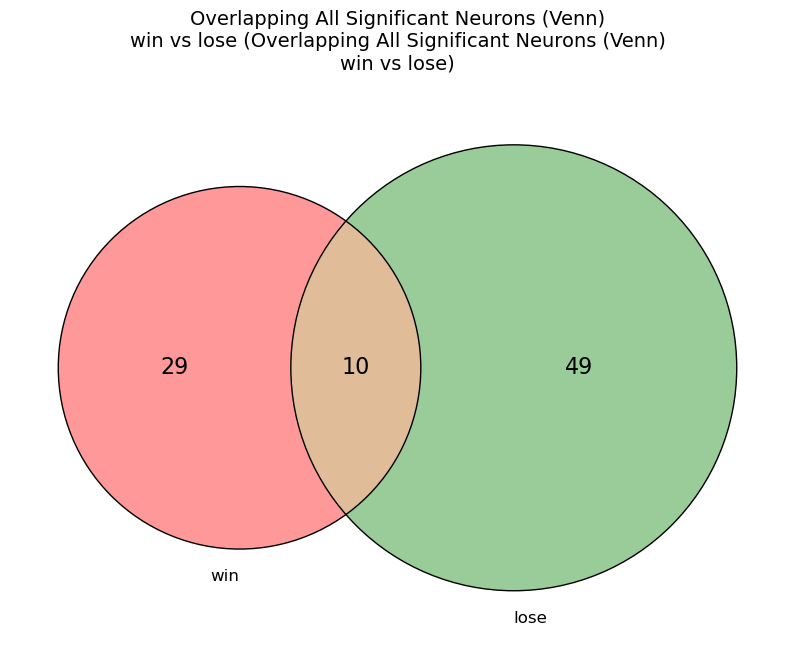

In [ ]:
_ = create_venn_diagram(units_df, ['win', 'lose'], significance_type='both', title="All Significant Units");

## Weird Problem, shows an overlap of 10 but there's only an overlap of 6 when you look at it seperately.
- Look for yourself what the unique values in lose and win is for both
- then look to see how many are increase and how many are decrease, count them and see what's missing

win: 37 significant units
lose: 55 significant units

Overlap between win and lose: 6 units


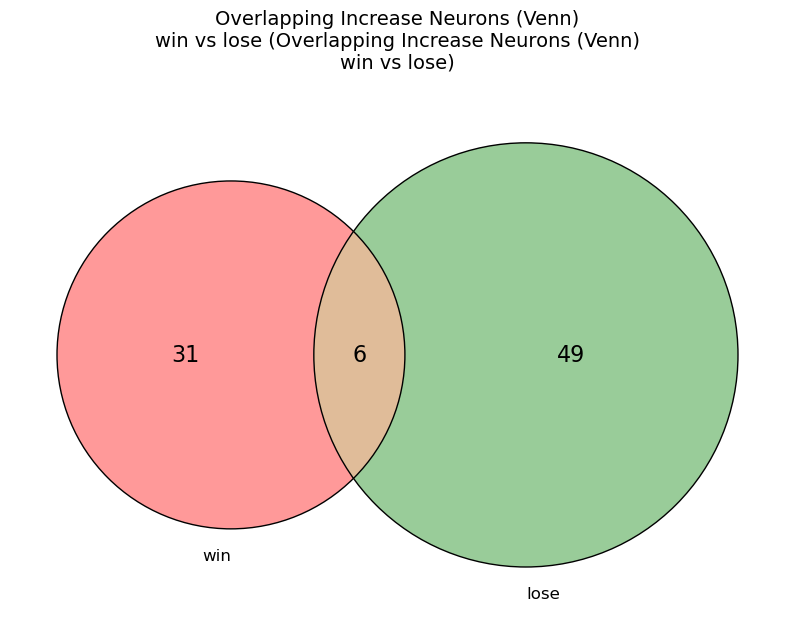

win: 2 significant units
lose: 4 significant units

Overlap between win and lose: 0 units


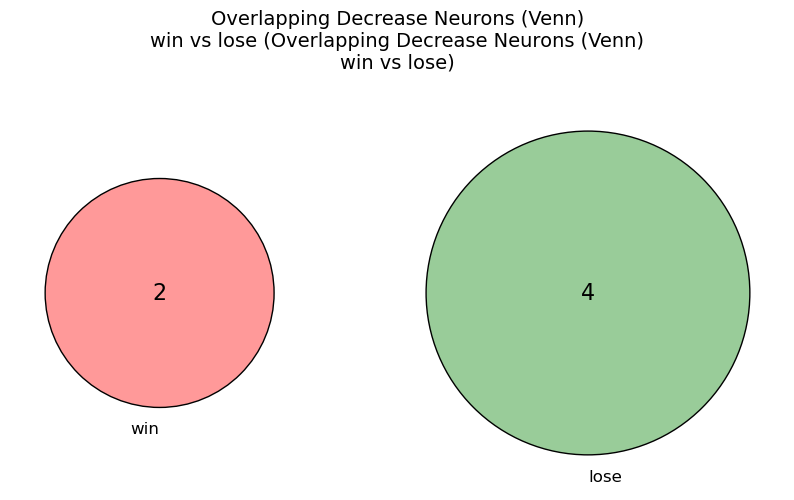

In [264]:
_ = create_venn_diagram(units_df, ['win', 'lose'], significance_type='increase', title="All Significant Units");
_ = create_venn_diagram(units_df, ['win', 'lose'], significance_type='decrease', title="All Significant Units");


EXAMPLE 4: Batch Analysis of Multiple Comparisons

ANALYSIS 1: high_comp_win vs low_comp_win (2 events)
high_comp_win: 31 significant units
low_comp_win: 48 significant units

Overlap between high_comp_win and low_comp_win: 15 units


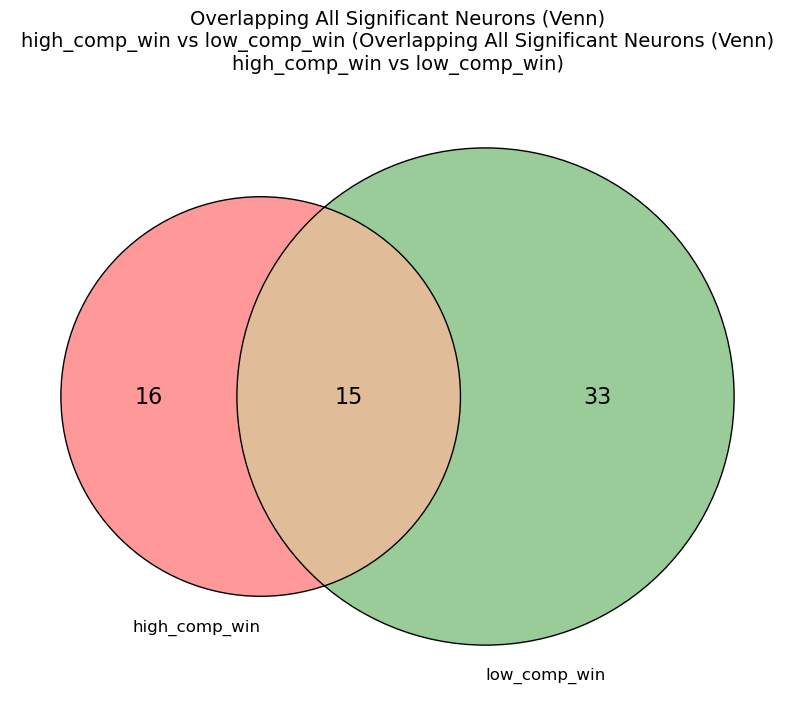


ANALYSIS 2: high_comp_lose vs low_comp_lose (2 events)
high_comp_lose: 66 significant units
low_comp_lose: 44 significant units

Overlap between high_comp_lose and low_comp_lose: 13 units


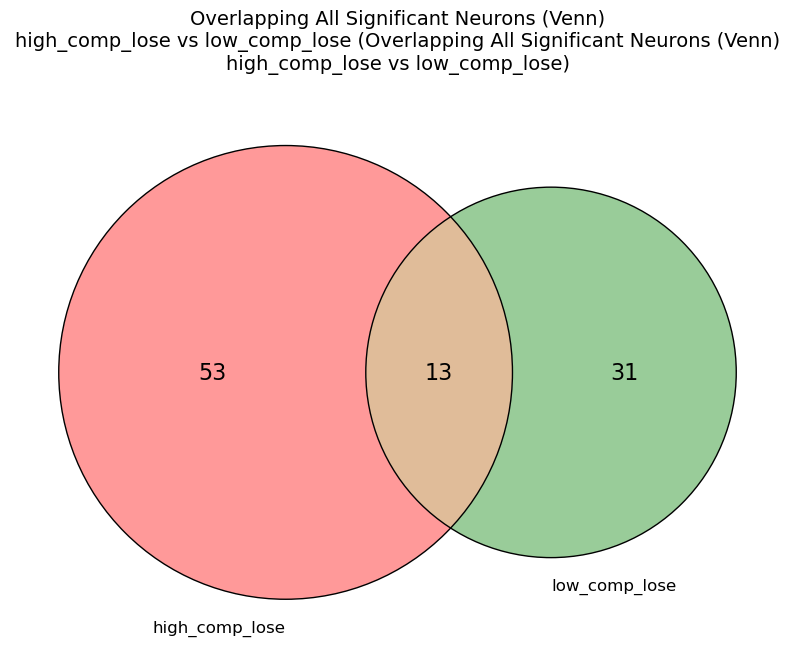


ANALYSIS 3: alone_rewarded vs high_comp vs low_comp (3 events)
alone_rewarded: 20 significant units
high_comp: 30 significant units
low_comp: 41 significant units

Three-way overlap: 5 units
Three-way overlap units: ['20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec__Unit52', '20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec__Unit68', '20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec__Unit108', '20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec__Unit23', '20240322_160946_alone_comp_subj_4-3_t6b6_merged.rec__Unit183']

Pairwise overlaps:
  alone_rewarded & high_comp: 8 units
  alone_rewarded & low_comp: 7 units
  high_comp & low_comp: 14 units


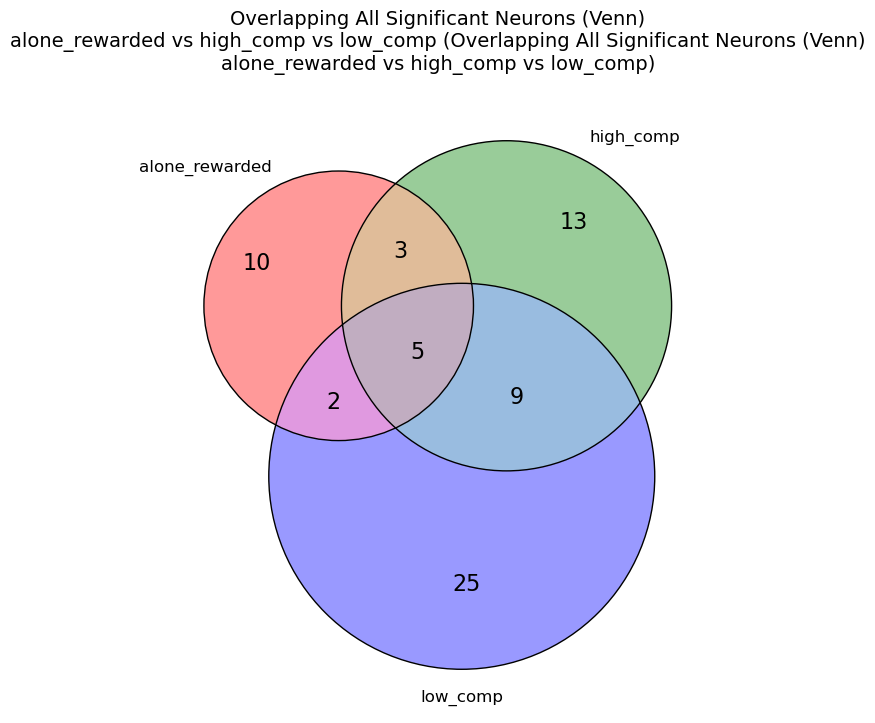

In [260]:
# Example 4: Batch analysis of multiple event groups
print("\nEXAMPLE 4: Batch Analysis of Multiple Comparisons")

event_comparisons = [
    ['high_comp_win', 'low_comp_win'],  # Win conditions
    ['high_comp_lose', 'low_comp_lose'], # Lose conditions
    ['alone_rewarded', 'high_comp', 'low_comp']  # All main reward conditions
]

analyze_event_overlap(units_df, event_comparisons, significance_type='both')


EXAMPLE 7: All Non-Baseline Events (7 events)
alone_rewarded: 20 significant units
high_comp: 30 significant units
high_comp_lose: 66 significant units
high_comp_win: 31 significant units
low_comp: 41 significant units
low_comp_lose: 44 significant units
low_comp_win: 48 significant units


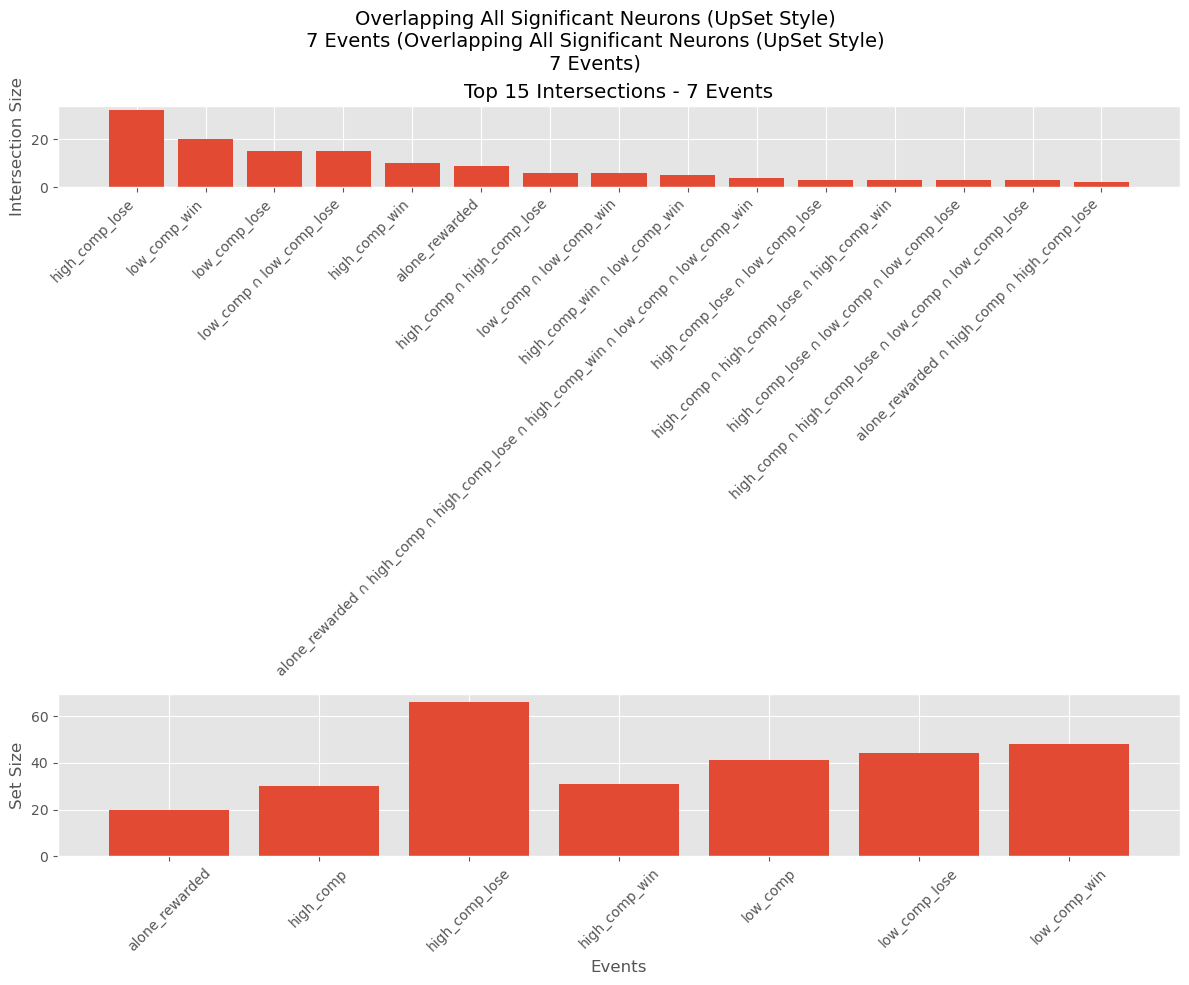


=== DETAILED OVERLAP STATISTICS ===
Total unique units across all events: 153
Individual event sizes: {'alone_rewarded': 20, 'high_comp': 30, 'high_comp_lose': 66, 'high_comp_win': 31, 'low_comp': 41, 'low_comp_lose': 44, 'low_comp_win': 48}

Top 10 intersections:
  1. high_comp_lose: 32 units
  2. low_comp_win: 20 units
  3. low_comp_lose: 15 units
  4. low_comp ∩ low_comp_lose: 15 units
  5. high_comp_win: 10 units
  6. alone_rewarded: 9 units
  7. high_comp ∩ high_comp_lose: 6 units
  8. low_comp ∩ low_comp_win: 6 units
  9. high_comp_win ∩ low_comp_win: 5 units
  10. alone_rewarded ∩ high_comp ∩ high_comp_lose ∩ high_comp_win ∩ low_comp ∩ low_comp_win: 4 units

Pairwise overlaps:
  alone_rewarded & high_comp: 8 units
  alone_rewarded & high_comp_lose: 7 units
  alone_rewarded & high_comp_win: 8 units
  alone_rewarded & low_comp: 7 units
  alone_rewarded & low_comp_lose: 1 units
  alone_rewarded & low_comp_win: 8 units
  high_comp & high_comp_lose: 27 units
  high_comp & high_comp_

In [261]:
# Example 7: Comprehensive analysis - all non-baseline events
print("\nEXAMPLE 7: All Non-Baseline Events (7 events)")
all_main_events = [
    'alone_rewarded', 'high_comp', 'high_comp_lose', 'high_comp_win', 
    'low_comp', 'low_comp_lose', 'low_comp_win'
]
_ = create_overlap_visualization(units_df, all_main_events, significance_type='both');


EXAMPLE 8: Mixed Batch Analysis (2, 3, 4-way Venn and 5+ UpSet comparisons)

ANALYSIS 1: high_comp_win vs low_comp_win (2 events)
high_comp_win: 31 significant units
low_comp_win: 48 significant units

Overlap between high_comp_win and low_comp_win: 15 units


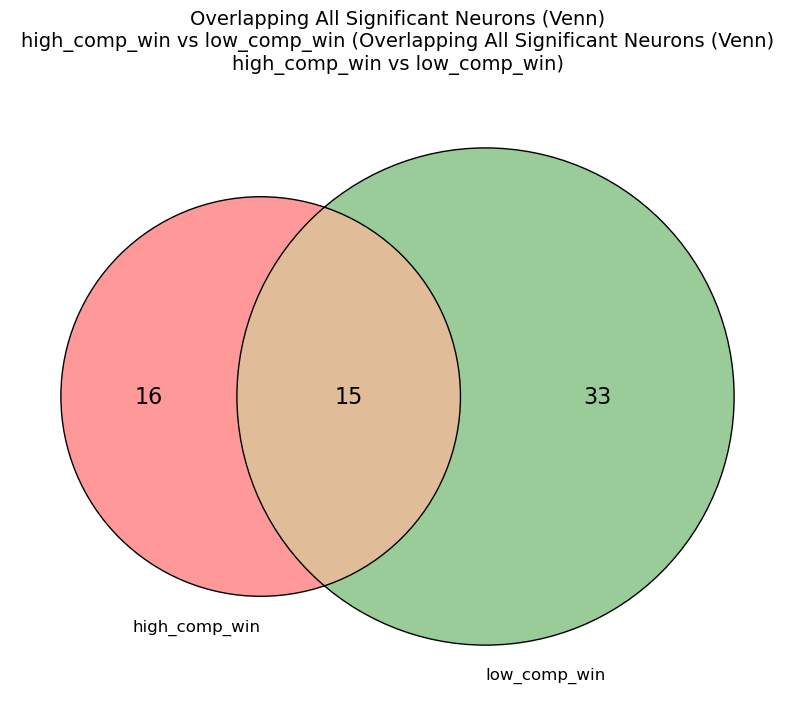


ANALYSIS 2: alone_rewarded vs win vs lose (3 events)
alone_rewarded: 20 significant units
win: 39 significant units
lose: 59 significant units

Three-way overlap: 2 units
Three-way overlap units: ['20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec__Unit68', '20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec__Unit74']

Pairwise overlaps:
  alone_rewarded & win: 8 units
  alone_rewarded & lose: 4 units
  win & lose: 10 units


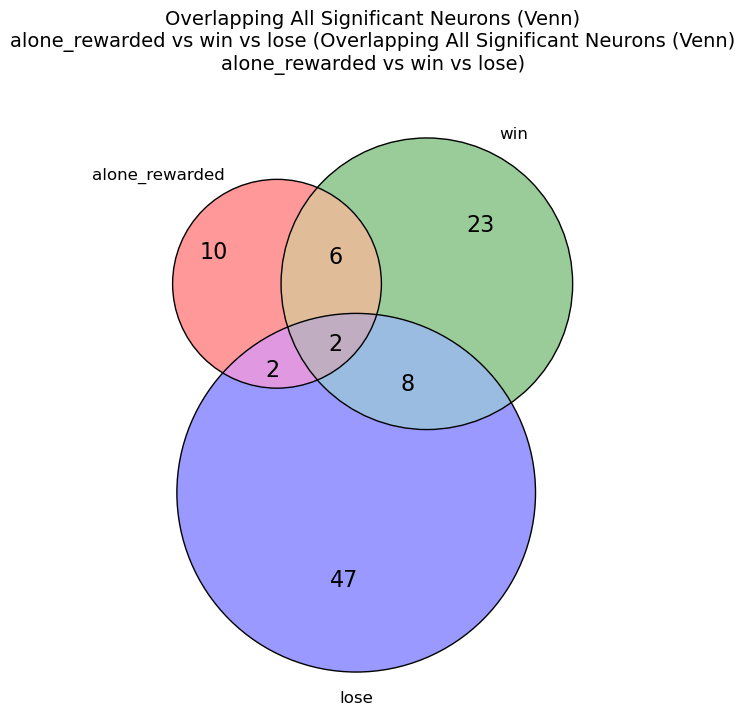


ANALYSIS 3: high_comp_win vs high_comp_lose vs low_comp_win vs low_comp_lose (4 events)
high_comp_win: 31 significant units
high_comp_lose: 66 significant units
low_comp_win: 48 significant units
low_comp_lose: 44 significant units


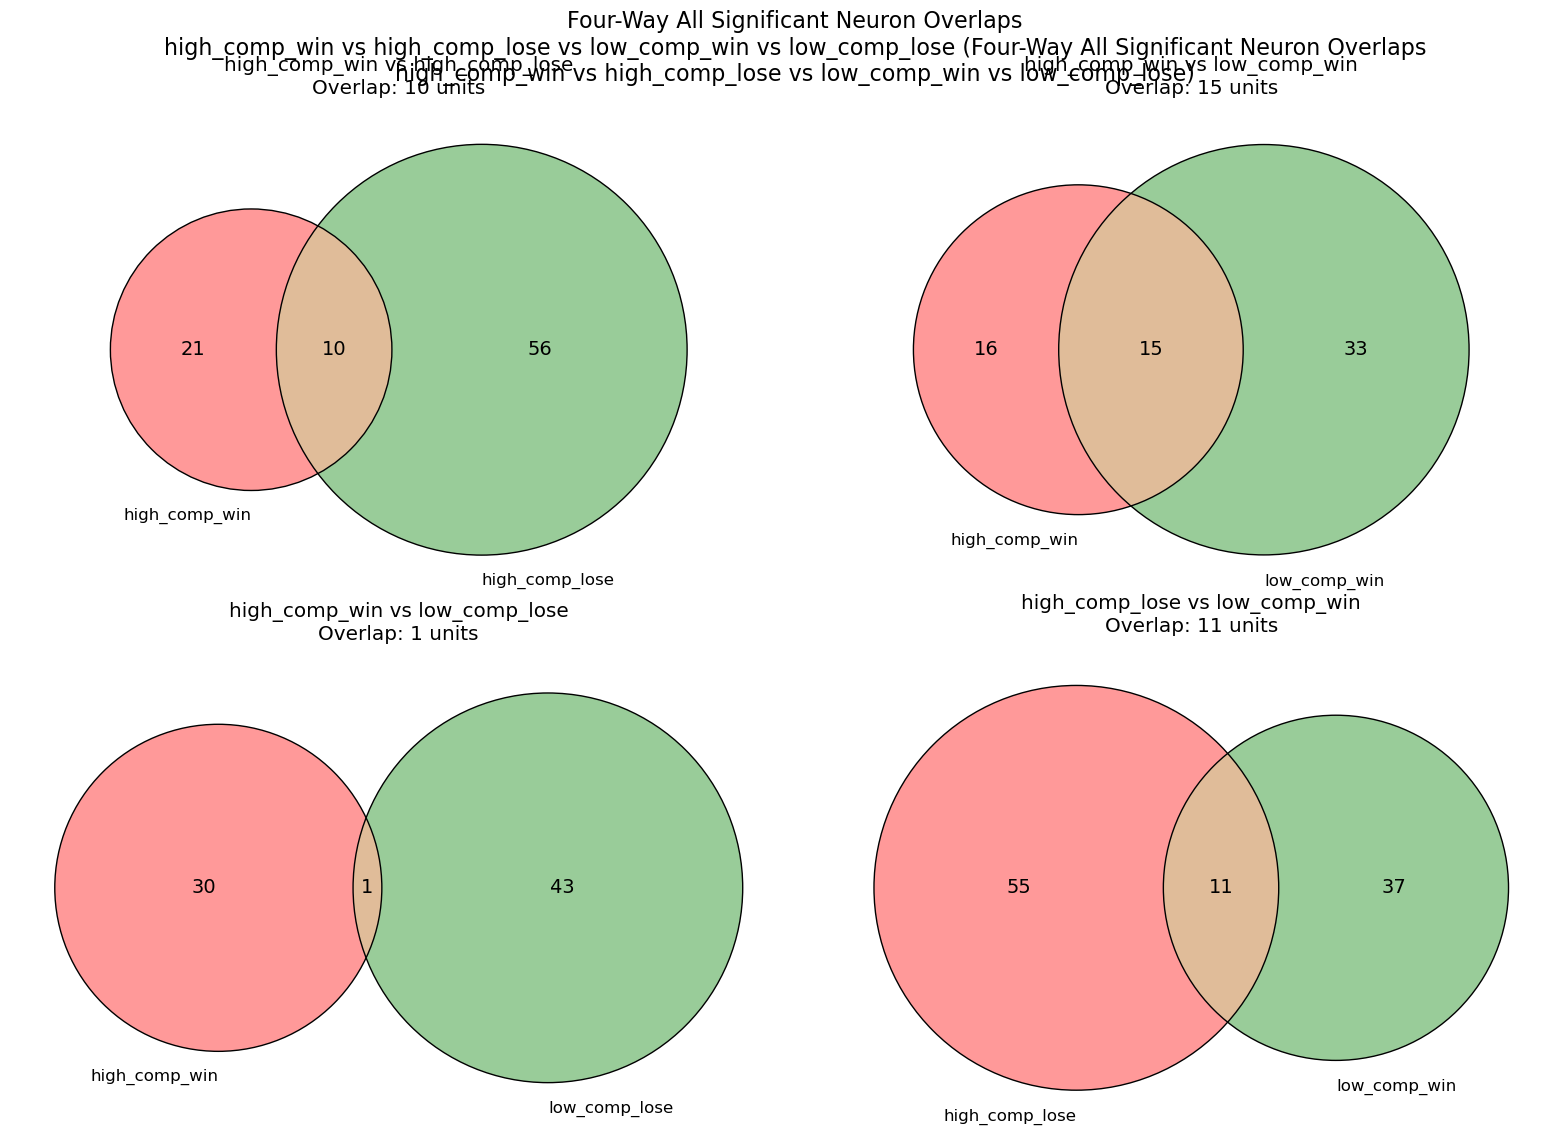


ANALYSIS 4: alone_rewarded vs high_comp vs low_comp vs win vs lose (5 events)
alone_rewarded: 20 significant units
high_comp: 30 significant units
low_comp: 41 significant units
win: 39 significant units
lose: 59 significant units


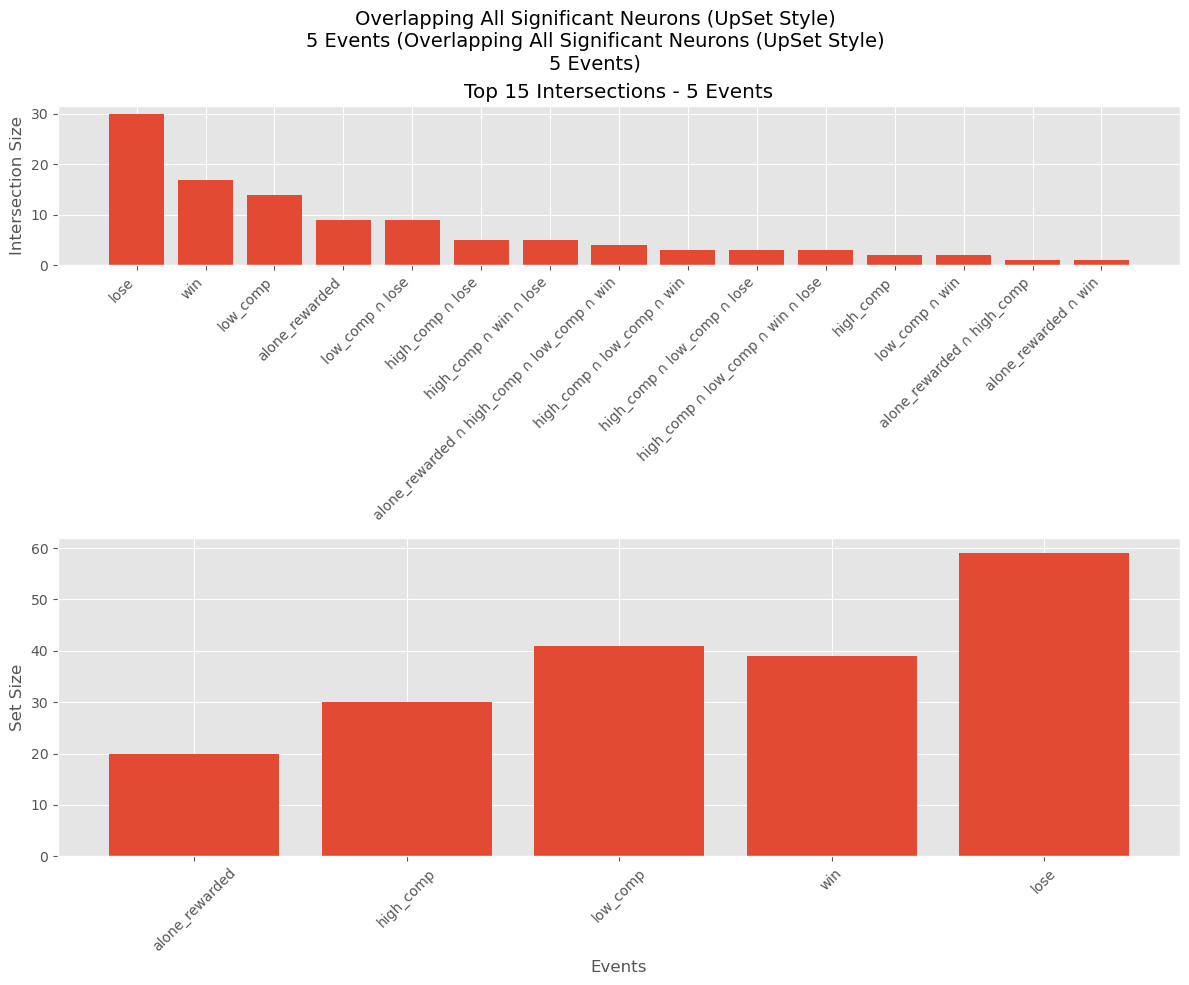


=== DETAILED OVERLAP STATISTICS ===
Total unique units across all events: 114
Individual event sizes: {'alone_rewarded': 20, 'high_comp': 30, 'low_comp': 41, 'win': 39, 'lose': 59}

Top 10 intersections:
  1. lose: 30 units
  2. win: 17 units
  3. low_comp: 14 units
  4. alone_rewarded: 9 units
  5. low_comp ∩ lose: 9 units
  6. high_comp ∩ lose: 5 units
  7. high_comp ∩ win ∩ lose: 5 units
  8. alone_rewarded ∩ high_comp ∩ low_comp ∩ win: 4 units
  9. high_comp ∩ low_comp ∩ win: 3 units
  10. high_comp ∩ low_comp ∩ lose: 3 units

Pairwise overlaps:
  alone_rewarded & high_comp: 8 units
  alone_rewarded & low_comp: 7 units
  alone_rewarded & win: 8 units
  alone_rewarded & lose: 4 units
  high_comp & low_comp: 14 units
  high_comp & win: 18 units
  high_comp & lose: 19 units
  low_comp & win: 14 units
  low_comp & lose: 17 units
  win & lose: 10 units


In [262]:
# Example 8: Updated batch analysis with mixed 2, 3, 4-way Venn and 5+ UpSet comparisons
print("\nEXAMPLE 8: Mixed Batch Analysis (2, 3, 4-way Venn and 5+ UpSet comparisons)")

mixed_event_comparisons = [
    ['high_comp_win', 'low_comp_win'],  # 2-way (Venn)
    ['alone_rewarded', 'win', 'lose'], # 3-way (Venn)
    ['high_comp_win', 'high_comp_lose', 'low_comp_win', 'low_comp_lose'], # 4-way (Venn)
    ['alone_rewarded', 'high_comp', 'low_comp', 'win', 'lose'] # 5-way (UpSet)
]

analyze_event_overlap(units_df, mixed_event_comparisons, significance_type='both')